In [ ]:
import os
from collections import defaultdict

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
get_data = lambda path:  pd.read_excel(path,engine="openpyxl", usecols="B:H")

In [3]:

logs_path = "../logs"

exp_data = defaultdict(dict)

for dataset in os.listdir(logs_path):
    
#     if dataset=="Feynman-03":
    model_results = defaultdict(dict)
    dataset_path = os.path.join(logs_path, dataset+"/num_points")

    for file in sorted(os.listdir(dataset_path), key=lambda x: x.lower()):
        header = file.split("_")
        model = header[0]
        noise = header[2].split("-")[1]

        model_results[model][noise] = get_data(os.path.join(dataset_path, file))

    print(model_results.keys())
    exp_data[dataset] = dict(model_results)


dict_keys(['AIF', 'dsr', 'gplearn', 'NeSymRes'])
dict_keys(['AIF', 'dsr', 'gplearn', 'NeSymRes'])


In [4]:
dataset_df = {}

for dataset in os.listdir(logs_path):

    acc, tim = [], []

    df_dict = {
        "model":[],
        "accuracy":[],
        "number_of_points":[],
        "duration":[]
    }    
    
    models = sorted(exp_data[dataset].keys())
    for model in models:
        
        noises = sorted(exp_data[dataset][model].keys(), key=lambda x: int(x))
        for noise in noises:
            
            df_col = exp_data[dataset][model][noise]
            
            acc = len(df_col[df_col["accuracy"]>=0.95])/len(df_col)        
            dur = exp_data[dataset][model][noise].describe()['time']['mean']

            df_dict["model"].append(model)
            df_dict["accuracy"].append(acc)
            df_dict["number_of_points"].append(noise)
            df_dict["duration"].append(dur)            
            
    df = pd.DataFrame(data=df_dict)
    dataset_df[dataset] = df

In [ ]:
def show_recovery_vs_pts_plot(dataset: str="Feynman-03"):
    sns.set_theme(style="ticks")
    sns.set_style('whitegrid')
    
    grid = sns.FacetGrid(dataset_df[dataset], col="model", hue="model",
                         col_wrap=4, height=4.5)
    
    grid.fig.suptitle(dataset+" Effect of number of support points on recovery rate")

    grid.refline(y=dataset_df[dataset]['accuracy'].max(), linestyle=":")
    grid.refline(y=dataset_df[dataset]['accuracy'].min(), linestyle=":")

    grid.map(plt.plot, "number_of_points", "accuracy", marker="o")

    grid.set_axis_labels("number of points", "Recovery rate")

    grid.set(ylim=(-0.1, 1.0))

    iterator = zip(
        grid.axes.flat, 
        ["AIF", "gplearn", "dsr", "NeSymRes"], 
        ["AIFeynman", "Gplearn", "DSR", "NeSymRes"]
    )

    for ax, model, title in iterator:
        ax.set_title(title)

        local_df = dataset_df[dataset][dataset_df[dataset]["model"]==model]

        no_noise_acc = float(local_df[local_df["number_of_points"]=="200"]["accuracy"])
        most_noise_acc = float(local_df[local_df["number_of_points"]=="50"]["accuracy"])

        acc_change = (most_noise_acc - no_noise_acc)/most_noise_acc
        ax.text(1.2, 0.85,f'Change of {acc_change*100:.2f}%', fontsize=12)
        
def show_pts_vs_duration_plot(dataset: str="Feynman-03"):
    
    sns.set_theme(style="ticks")
    sns.set_style('whitegrid')
    
    grid = sns.FacetGrid(dataset_df[dataset], col="model", hue="model",
                         col_wrap=4, height=4.5)
    
    grid.fig.suptitle(dataset+" Effect of support points on recovery time")

    grid.refline(y=dataset_df[dataset]['duration'].max(), linestyle=":")
    grid.refline(y=dataset_df[dataset]['duration'].min(), linestyle=":")

    grid.map(plt.plot, "number_of_points", "duration", marker="o")

    grid.set_axis_labels("number of points", "Avg recovery duration (sec)")


    iterator = zip(
        grid.axes.flat, 
        ["AIF", "gplearn", "dsr", "NeSymRes"], 
        ["AIFeynman", "Gplearn", "DSR", "NeSymRes"]
    )

    for ax, model, title in iterator:
        ax.set_title(title)

        local_df = dataset_df[dataset][dataset_df[dataset]["model"]==model]

        no_noise_dur = float(local_df[local_df["number_of_points"]=="200"]["duration"])
        most_noise_dur = float(local_df[local_df["number_of_points"]=="50"]["duration"])

        dur_change = (no_noise_dur - most_noise_dur)/no_noise_dur
        ax.text(0.15, 50,f'Drop of {dur_change*100:.2f}%', fontsize=12)

show_recovery_vs_pts_plot()
# show_pts_vs_duration_plot()

show_recovery_vs_pts_plot("nguyen-12")
# show_pts_vs_duration_plot("nguyen-12")

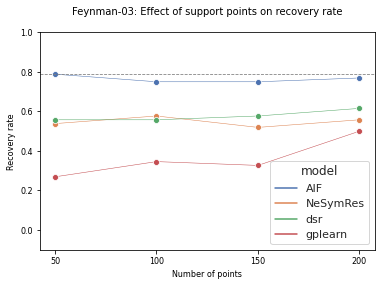

In [5]:
def show_acc_plot(dataset:str="Feynman-03"):
    rcParams['figure.figsize'] = 2.5,2
    plt.xlabel('Number of points', fontsize=8)
    plt.ylabel('Recovery rate',fontsize=8);
    plt.tick_params(axis='both', which='major', labelsize=8)

    sns.set_theme(style="ticks")
    sns.set_style('whitegrid')

    fig = sns.lineplot(
        data=dataset_df[dataset],
        x="number_of_points", y="accuracy", 
        hue="model", marker="o", 
#         legend=False,
        linewidth = 0.5,
    )
    
    fig.set_title(f"{dataset}: Effect of support points on recovery rate\n", fontsize=10)
    fig.axhline(dataset_df[dataset]["accuracy"].max(), linestyle="--", linewidth=0.8, color='gray')
    

    fig.set_ylim(-0.1, 1.0)
#     plt.legend(["AIFeynman", "NeSymRes", "Deep symbolic regression", "Gplearn",], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8)
    
show_acc_plot("Feynman-03")

In [8]:
dataset_df["Feynman-03"]

,model,accuracy,number_of_points,duration
0,AIF,0.788462,50,65.947419
1,AIF,0.750000,100,66.081755
2,AIF,0.750000,150,66.237324
3,AIF,0.769231,200,64.797466
4,NeSymRes,0.538462,50,38.345036
5,NeSymRes,0.576923,100,41.144964
6,NeSymRes,0.519231,150,41.527272
7,NeSymRes,0.557692,200,23.728346
8,dsr,0.557692,50,29.488451
9,dsr,0.557692,100,28.967297


In [9]:
dataset_df["nguyen-12"]

,model,accuracy,number_of_points,duration
0,AIF,0.750000,50,67.180626
1,AIF,0.833333,100,67.492501
2,AIF,0.583333,150,67.863700
3,AIF,0.583333,200,68.222972
4,NeSymRes,0.083333,50,25.359189
5,NeSymRes,0.083333,100,25.816445
6,NeSymRes,0.083333,150,25.509675
7,NeSymRes,0.000000,200,23.558395
8,dsr,0.750000,50,27.148403
9,dsr,0.833333,100,28.777879
